In [ ]:
# DT
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Function importing Dataset
def importdata():
    balance_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data',
    sep= ',', header = None)
    # Printing the dataswet shape
    print ("Dataset Length: ", len(balance_data))
    print ("Dataset Shape: ", balance_data.shape)
    # Printing the dataset obseravtions
    print ("Dataset: ",balance_data.head())
    return balance_data

# Function to split the dataset
def splitdataset(balance_data):
    # Separating the target variable
    X = balance_data.values[:, 1:5]
    Y = balance_data.values[:, 0]
    # Splitting the dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size = 0.3, random_state = 100)
    return X, Y, X_train, X_test, y_train, y_test

# Function to perform training with giniIndex.
def train_using_gini(X_train, X_test, y_train):
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=5)
    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini

# Function to perform training with entropy.
def tarin_using_entropy(X_train, X_test, y_train):
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 3, min_samples_leaf = 5)
    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy


# Function to make predictions
def prediction(X_test, clf_object):
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
    print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
    print ("Accuracy : ", accuracy_score(y_test,y_pred)*100)
    print("Report : ", classification_report(y_test, y_pred))


# Building Phase
data = importdata()
X, Y, X_train, X_test, y_train, y_test = splitdataset(data)
clf_gini = train_using_gini(X_train, X_test, y_train)
clf_entropy = tarin_using_entropy(X_train, X_test, y_train)
# Operational Phase
print("Results Using Gini Index:")
# Prediction using gini
y_pred_gini = prediction(X_test, clf_gini)
cal_accuracy(y_test, y_pred_gini)
print("Results Using Entropy:")
# Prediction using entropy
y_pred_entropy = prediction(X_test, clf_entropy)
cal_accuracy(y_test, y_pred_entropy)

In [ ]:
# Linear Reg
from sklearn.linear_model import LinearRegression

advert = pd.read_csv('advertising.csv')
advert.head()
predictors = ['TV', 'Radio']
X = advert[predictors]
Y = advert['Sales']

X, Y, X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

# Initialise and fit model
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print ("Accuracy : ", accuracy_score(y_test,y_pred)*100)
print("Report : ", classification_report(y_test, y_pred))
print(f'alpha = {lm.intercept_}')
print(f'betas = {lm.coef_}')

In [ ]:
#KNN
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

df = pd.read_csv('advertising.csv')
array = df.values
X = array[:, 0:4]
Y = array[:, 4]
t_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=t_size, random_state=seed)

#using default i.e, k=5
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_test)
print("Accuracy = ",accuracy_score(Y_test, predictions))
print("Confusion Matrix : \n",confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

#using multiple val of k
for k in range(1,11):
    print("k=", k, end = " ")
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    predictions = knn.predict(X_test)
    print(" ,  Accuracy = ", accuracy_score(Y_test, predictions))
    print("Confusion Matrix : \n",confusion_matrix(Y_test, predictions))
    print(classification_report(Y_test, predictions))
    print("\n")
    
#standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
#X_train = scaler.fit_transform(X_train)

#error
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
#plotting the val
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [3]:
# Nural network 

#feed forward
import numpy as np
input_vector = [1.72, 1.23]
weights_1 = [1.26, 0]
weights_2 = [2.17, 0.32]
dot_product_1 = np.dot(input_vector, weights_1)
dot_product_2 = np.dot(input_vector, weights_2)

print(f"The dot product is: {dot_product_2}")
print(f"The dot product is: {dot_product_1}")
#single layer
input_vector = np.array([1.66, 1.56])
weights_1 = np.array([1.45, -0.66])
bias = np.array([0.0])

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def make_prediction(input_vector, weights, bias):
     layer_1 = np.dot(input_vector, weights) + bias
     layer_2 = sigmoid(layer_1)
     return layer_2

prediction = make_prediction(input_vector, weights_1, bias)
print(f"The prediction result is: {prediction}")

#mean square error
target = 0
mse = np.square(prediction - target)
print(f"Prediction: {prediction}; Error: {mse}")

#back propagation

The dot product is: 4.1259999999999994
The dot product is: 2.1672
The prediction result is: [0.7985731]
Prediction: [0.7985731]; Error: [0.637719]


In [4]:
#Neural network
class NeuralNetwork:
    def __init__(self, learning_rate):
        self.weights = np.array([np.random.randn(), np.random.randn()])
        self.bias = np.random.randn()
        self.learning_rate = learning_rate

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _sigmoid_deriv(self, x):
        return self._sigmoid(x) * (1 - self._sigmoid(x))

    def predict(self, input_vector):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2
        return prediction

    def _compute_gradients(self, input_vector, target):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2

        derror_dprediction = 2 * (prediction - target)
        dprediction_dlayer1 = self._sigmoid_deriv(layer_1)
        dlayer1_dbias = 1
        dlayer1_dweights = (0 * self.weights) + (1 * input_vector)

        derror_dbias = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dbias
        )
        derror_dweights = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dweights
        )

        return derror_dbias, derror_dweights

    def _update_parameters(self, derror_dbias, derror_dweights):
        self.bias = self.bias - (derror_dbias * self.learning_rate)
        self.weights = self.weights - (
            derror_dweights * self.learning_rate
        )
    
learning_rate = 0.1
neural_network = NeuralNetwork(learning_rate)
neural_network.predict(input_vector)


0.9757374086475602

In [ ]:
# another func in NN
def train(self, input_vectors, targets, iterations):
        cumulative_errors = []
        for current_iteration in range(iterations):
            # Pick a data instance at random
            random_data_index = np.random.randint(len(input_vectors))

            input_vector = input_vectors[random_data_index]
            target = targets[random_data_index]

            # Compute the gradients and update the weights
            derror_dbias, derror_dweights = self._compute_gradients(
                input_vector, target
            )

            self._update_parameters(derror_dbias, derror_dweights)

            # Measure the cumulative error for all the instances
            if current_iteration % 100 == 0:
                cumulative_error = 0
                # Loop through all the instances to measure the error
                for data_instance_index in range(len(input_vectors)):
                    data_point = input_vectors[data_instance_index]
                    target = targets[data_instance_index]

                    prediction = self.predict(data_point)
                    error = np.square(prediction - target)

                    cumulative_error = cumulative_error + error
                cumulative_errors.append(cumulative_error)

        return cumulative_errors

True positives:  2 
True negatives:  4 
False positives:  0 
False negatives:  0 
Accuracy:  1.0


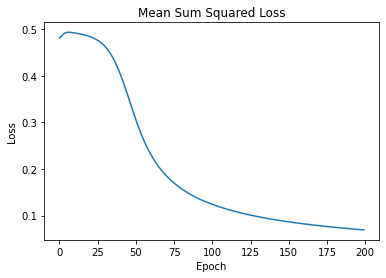

In [1]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

input_train = np.array([[0, 1, 0], [0, 1, 1], [0, 0, 0], 
                        [10, 0, 0], [10, 1, 1], [10, 0, 1]])
output_train = np.array([[0], [0], [0], [1], [1], [1]])
input_pred = np.array([1, 1, 0])

input_test = np.array([[1, 1, 1], [10, 0, 1], [0, 1, 10], 
                       [10, 1, 10], [0, 0, 0], [0, 1, 1]])
output_test = np.array([[0], [1], [0], [1], [0], [0]])

scaler = MinMaxScaler()
input_train_scaled = scaler.fit_transform(input_train)
output_train_scaled = scaler.fit_transform(output_train)
input_test_scaled = scaler.fit_transform(input_test)
output_test_scaled = scaler.fit_transform(output_test)

class NeuralNetwork():
    def __init__(self, ):
        self.inputSize = 3
        self.outputSize = 1
        self.hiddenSize = 3

        self.W1 = np.random.rand(self.inputSize, self.hiddenSize)
        self.W2 = np.random.rand(self.hiddenSize, self.outputSize)

        self.error_list = []
        self.limit = 0.5
        self.true_positives = 0
        self.false_positives = 0
        self.true_negatives = 0
        self.false_negatives = 0

    def forward(self, X):
        self.z = np.matmul(X, self.W1)
        self.z2 = self.sigmoid(self.z)
        self.z3 = np.matmul(self.z2, self.W2)
        o = self.sigmoid(self.z3)
        return o

    def sigmoid(self, s):
        return 1 / (1 + np.exp(-s))

    def sigmoidPrime(self, s):
        return s * (1 - s)

    def backward(self, X, y, o):
        self.o_error = y - o
        self.o_delta = self.o_error * self.sigmoidPrime(o)
        self.z2_error = np.matmul(self.o_delta,
                                  np.matrix.transpose(self.W2))
        self.z2_delta = self.z2_error * self.sigmoidPrime(self.z2)
        self.W1 += np.matmul(np.matrix.transpose(X), self.z2_delta)
        self.W2 += np.matmul(np.matrix.transpose(self.z2),
                             self.o_delta)

    def train(self, X, y, epochs):
        for epoch in range(epochs):
            o = self.forward(X)
            self.backward(X, y, o)
            self.error_list.append(np.abs(self.o_error).mean())

    def predict(self, x_predicted):
        return self.forward(x_predicted).item()

    def view_error_development(self):
        plt.plot(range(len(self.error_list)), self.error_list)
        plt.title('Mean Sum Squared Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')

    def test_evaluation(self, input_test, output_test):
        for i, test_element in enumerate(input_test):
            if self.predict(test_element) > self.limit and \
                    output_test[i] == 1:
                self.true_positives += 1
            if self.predict(test_element) < self.limit and \
                    output_test[i] == 1:
                self.false_negatives += 1
            if self.predict(test_element) > self.limit and \
                    output_test[i] == 0:
                self.false_positives += 1
            if self.predict(test_element) < self.limit and \
                    output_test[i] == 0:
                self.true_negatives += 1
        print('True positives: ', self.true_positives,
              '\nTrue negatives: ', self.true_negatives,
              '\nFalse positives: ', self.false_positives,
              '\nFalse negatives: ', self.false_negatives,
              '\nAccuracy: ',
              (self.true_positives + self.true_negatives) /
              (self.true_positives + self.true_negatives +
               self.false_positives + self.false_negatives))
        
    
NN = NeuralNetwork()
NN.train(input_train_scaled, output_train_scaled, 200)
NN.predict(input_pred)
NN.view_error_development()
NN.test_evaluation(input_test_scaled, output_test_scaled)